In [ ]:
#Upload API Kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rosyidanakmal","key":"5f124d47b99ae93550ae8380b0c9a23c"}'}

In [ ]:
#Install Kaglle + Create Dir
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [ ]:
#Autentikasi Akun Kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [ ]:
#Download dataset dan unzip
from zipfile import ZipFile

api.dataset_download_files('akash14/house-price-dataset')
zf = ZipFile('house-price-dataset.zip')
zf.extractall() 
zf.close()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

data = pd.read_csv('Participants_Data_HPP/Train.csv')
data.head(5)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [ ]:
data.isna().values.any()

False

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

labelencoder_BHK = LabelEncoder()
X.iloc[:, 4]= labelencoder_BHK.fit_transform(X.iloc[:, 4])

del X['ADDRESS']
del X['LONGITUDE']
del X['LATITUDE']
del X['POSTED_BY']
X['BHK_NO.']
X['BHK_OR_RK']

square_scaler = StandardScaler()
X["SQUARE_FT"] = square_scaler.fit_transform(X["SQUARE_FT"].to_numpy().reshape(-1,1))


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

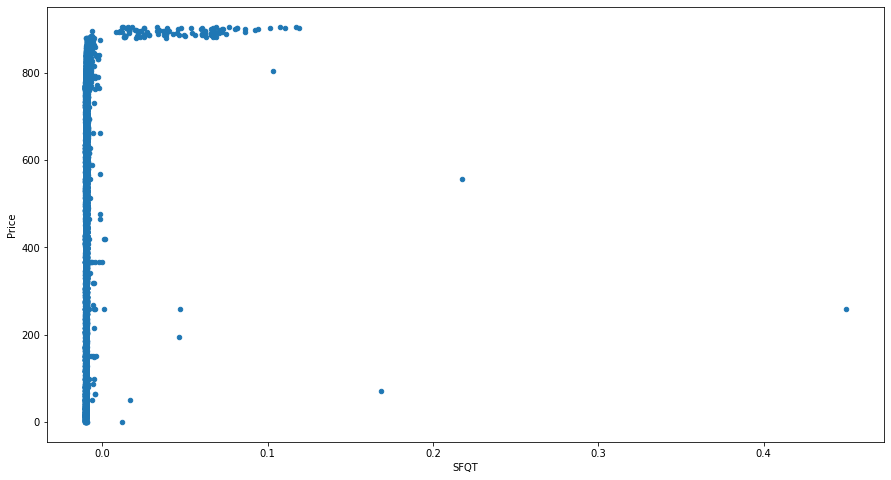

KeyboardInterrupt: ignored

In [ ]:
from scipy import stats
import numpy as np
class PriceRegression:
  def __init__(self, y_categories, solver, max_iter):
    self.y_categories = y_categories
    self.solver = solver
    self.max_iter = max_iter
  def fit(self, X, y):
    y, y_bins = pd.qcut(y, self.y_categories, labels=False, retbins = True, duplicates='drop')
    self.y_values = y_bins[:-1] + y_bins[1:]/2 
    self.y_bins = y_bins[1:-1]
    df = pd.DataFrame({'SFQT': X["SQUARE_FT"], 'Price': y})
    df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
    df.plot(kind='scatter',figsize=(15,8),x='SFQT', y='Price')
    plt.show()
    self.model = LogisticRegression(solver=self.solver, max_iter=self.max_iter)
    self.model.fit(X, y)
  def predict(self, X):
    y = self.model.predict(X)
    return self.y_values[y]
 
model = PriceRegression(10000, "lbfgs", 400)
model.fit(X_train, y_train)

In [ ]:
model.predict(X_train)

array([164.854,  67.4  , 164.854, ..., 164.854,  67.4  , 164.854])

       Actual  Predicted
21992    34.9    149.900
29060   170.0    149.900
6778     35.0     67.400
4730     55.0    149.900
28825    20.3    164.854
13090    27.0     67.400
24149    31.0     52.400
25594    26.2    164.854
21203    50.0    149.900
15139   130.0    149.900
16819    33.0     67.400
26857    32.0    149.900
15331    52.0     67.400
6531     49.0    149.900
9285     24.0    149.900


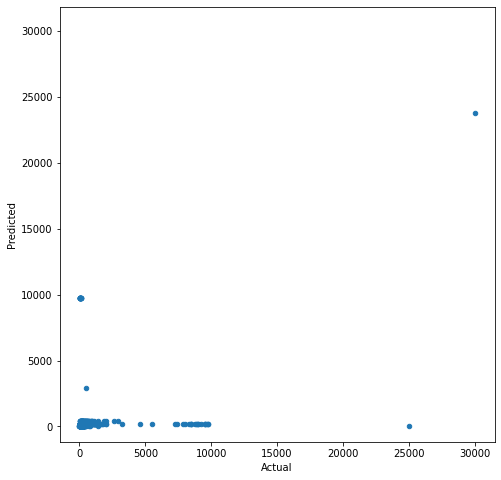

In [ ]:
from scipy import stats

y_pred = model.predict(X_test)
mask = (y_pred < 100000)
df = pd.DataFrame({'Actual': y_test[mask], 'Predicted': y_pred[mask]})
print(df.head(15))

df.plot(kind='scatter',figsize=(15,8),x='Actual', y='Predicted')
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

plt.axis('square')
plt.show()

In [116]:
from sklearn import metrics
import numpy as np

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 166.38429610931934
Mean Squared Error: 757977.0581694457
Root Mean Squared Error: 870.6187788977709


In [120]:
a,b,c,d,e,f,g = int(input("Under Construction (0 / 1) : ")) ,  int(input("RERA APPROVED (0 / 1) :")) ,  int(input("Number of Room  (Int) : ")) ,  input("Type of Property (BHK/RK) : "),  float(input("Square Ft (Float) : ")) ,  int(input("Ready to move (0 / 1) : " )) ,  int(input("Resale :")) 

d = labelencoder_BHK.transform(np.array([d]))[0]
e = square_scaler.transform(np.array([[e]]))[0,0]

test_input = np.array([[a , b , c , d , e , f , g]])
print("")
test = model.predict(test_input)
print("====================")
print("Hasil Prediksi : ")
print(test)
print("====================")

Under Construction (0 / 1) : 1
RERA APPROVED (0 / 1) :1
Number of Room  (Int) : 4
Type of Property (BHK/RK) : BHK
Square Ft (Float) : 312
Ready to move (0 / 1) : 1
Resale :1

Hasil Prediksi : 
[185.]
